In [1]:
# Import a library
import numpy as np
import pandas as pd
import docx
from datetime import datetime
import pyreadstat
import matplotlib.pyplot as plt

#  Read SPSS file

spss_file_path = ('Marketing Research.sav')

df, meta = pyreadstat.read_sav(spss_file_path, apply_value_formats=True)

# Save output as csv
csv_file_path =('Marketing Research.csv')
df.to_csv(csv_file_path, index=False)

# Get the shape (rows, columns)
print(f"Dataset shape: {df.shape}")

# Overview of data types and non-null counts
# print(df.info())

# Get variable labels from meta and set them as column names
variable_labels = meta.column_labels
df.columns = variable_labels  # Replace column names with variable labels


Dataset shape: (1400, 47)


## **DEMOGRAPHICS**

### **Race**

In [20]:
# # DEMOGRAPHICS
race=pd.DataFrame(df['What is your race?'].value_counts())
race_prcntg = ((race / total) * 100).round(1).astype(str)+'%'
race['pcntg']=race_prcntg
print(race)

                    count  pcntg
What is your race?              
Caucasian             959  68.5%
Black                 217  15.5%
Asian                 127   9.1%
Hispanic               87   6.2%
Other                   8   0.6%
American Indian         2   0.1%


#### Majority of the respondents (68%) identified themselves as Caucasian.

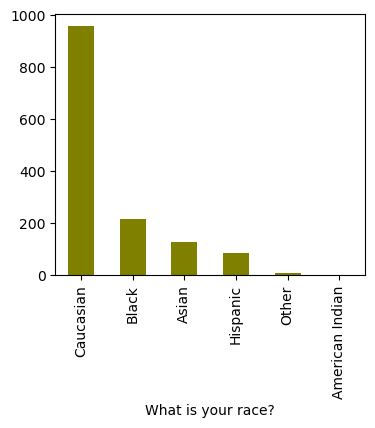

In [65]:
plt.figure(figsize=(4,3.4))
race.plot(kind='bar', color='olive')
plt.show()

### **Age**

In [22]:
# Count the occurrences of each age in the 'What is your age?' column
age = df['What is your age?'].value_counts()

# Define the bins (age ranges) and corresponding labels
bins = [20, 30, 40, 50, 60, 70]  # Bin edges representing the age ranges
labels = ['20–29', '30–39', '40–49', '50–59', '60–69']  # Labels for the corresponding age ranges

# Create a new column 'Age' that assigns each person to one of the defined age bins
df['Age'] = pd.cut(df['What is your age?'], bins=bins, labels=labels, right=False)
# The 'right=False' parameter means that the bin intervals are left-inclusive, i.e., the right edge is excluded.

# Count how many people fall into each age group defined by the bins
age = df['Age'].value_counts()

# Display the age group counts
print(age)


Age
30–39    562
40–49    375
20–29    363
50–59     93
60–69      7
Name: count, dtype: int64


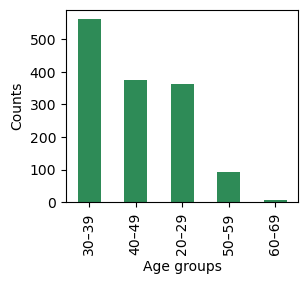

In [23]:
plt.figure(figsize=(3,2.5))
age.plot(kind='bar', color='seagreen')
plt.xlabel('Age groups')
plt.ylabel("Counts")
plt.show()

<Axes: ylabel='count'>

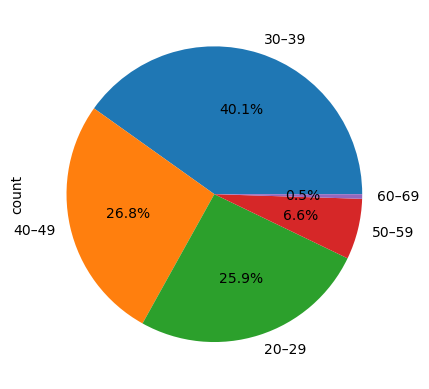

In [26]:
age.plot(kind='pie', autopct='%1.1f%%')

### **Marital Status**

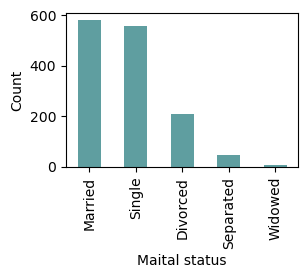

In [28]:

mar_status=df["What is your marital status?"].value_counts()
plt.figure(figsize=(3, 2))  # Set the desired size 
# Create the bar chart
mar_status.plot(kind='bar', color='cadetblue')
# plt.title('Marital Status')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

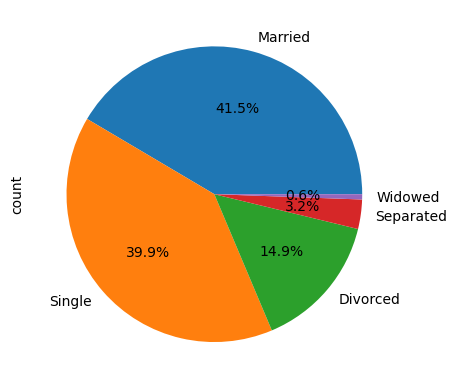

In [29]:
mar_status.plot(kind='pie',  autopct='%1.1f%%')

#### The Married and Single groups make up approximately the same percentage of respondents - 41.5% for Married and 39.9% for Single.

### **Children**

In [128]:
# Replace 0 with NaN in the specified column
# df['How many children under the age of 18 are living with you?'] = df['How many children under the age of 18 are living with you?'].replace(np.nan,0)
children_statisctics=df['How many children under the age of 18 are living with you?'].describe()
children_statisctics

count    842.000000
mean       1.522565
std        1.018305
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: How many children under the age of 18 are living with you?, dtype: float64

<Figure size 400x250 with 0 Axes>

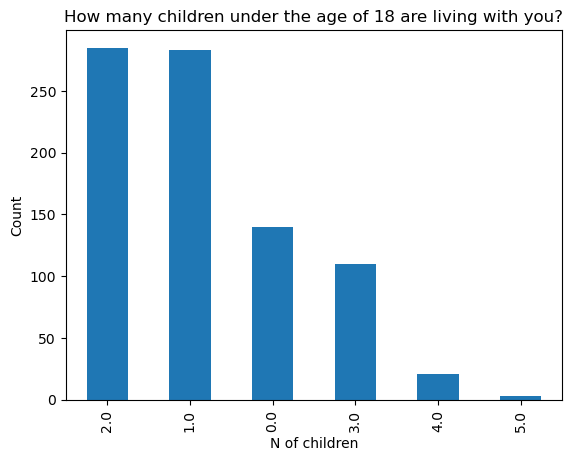

,count,prcntg
How many children under the age of 18 are living with you?,,
2.0,285,20.4%
1.0,283,20.2%
0.0,140,10.0%
3.0,110,7.9%
4.0,21,1.5%
5.0,3,0.2%


In [36]:
children_count=pd.DataFrame(df['How many children under the age of 18 are living with you?'].value_counts())
children_prcntg=((children_count/total)*100).round(1).astype(str)+'%'
children_count['prcntg']=children_prcntg
plt.figure(figsize=(4, 2.5))  # Set the desired size 
# Create the bar chart
children_count.plot(kind='bar', legend=False)
plt.title('How many children under the age of 18 are living with you?')
plt.xlabel('N of children')
plt.ylabel('Count')
plt.show()
children_count

#### 90% respondents (702) have children under the age of 18 living with them with the average number of children  1.5. The range is 0-5. The 2 biggest groups are respondents with 2 (20.4%) and 1 (20.2%) children under age 18 living with them. 

### **Education**

                                                    count prcntg
What is the highest level of education you have...              
Some college                                          328  23.4%
Undergraduate degree                                  295  21.1%
Graduate degree                                       235  16.8%
High school                                           229  16.4%
Other                                                 163  11.6%
Less than high school                                 150  10.7%


<Figure size 350x250 with 0 Axes>

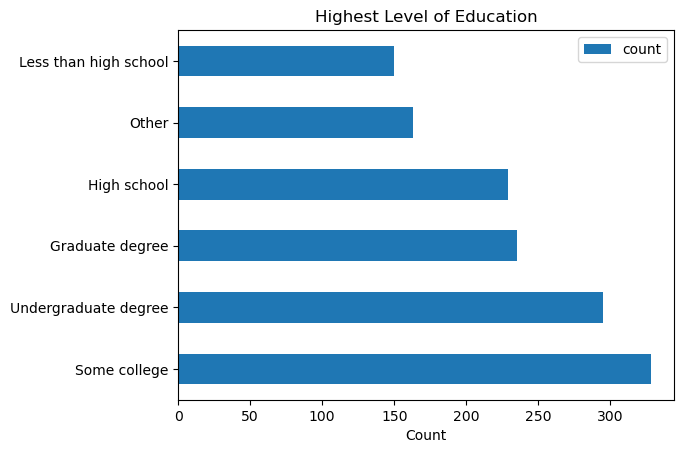

In [42]:
education=pd.DataFrame(df['What is the highest level of education you have completed?'].value_counts().sort_values(ascending=False))

prcntg = ((education/total)*100).round(1).astype(str)+'%'
education['prcntg']=prcntg
print(education)
plt.figure(figsize=(3.5, 2.5))  # Set the desired size 
# Create the bar chart
education.plot(kind='barh')
plt.title('Highest Level of Education')
plt.xlabel('Count')
plt.ylabel('')
plt.show()


#### The majority of respondents (61.3%) have college degree.

### **Gender**

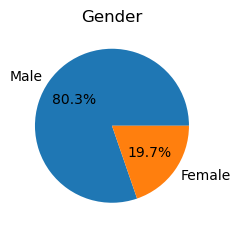

In [72]:
gender=df["Your gender is..."].value_counts()
plt.figure(figsize=(3.5, 2.5))  # Set the desired size 
labels = ['Male', 'Female']
gender.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender')
plt.ylabel('')
plt.show()

In [63]:
def prcnt (df, total):
    return(((df/total)*100).round(1).astype(str)+'%')
 


### **Household Income**

In [83]:
import pandas as pd

# Count occurrences of each income range and sort by index (lexicographically by default)
income = pd.DataFrame(
    df['What range indicates your total household income before taxes last year?']
    .value_counts()
)

# Calculate the percentage for each income range (assuming `prcnt` and `total` are predefined)
income['Percentage'] = prcnt(income, total)

# Define the custom order for income ranges
custom_order = [
    'Under $35,000', '$35,000 - $50,000', '$50,000 - $65,000',
    '$65,000 - $80,000', '$80,000 - $95,000',
    '$95,000 - $110,000', 'Over $110,000'
]

# Convert the index to a categorical type using the custom order
income['Income Range'] = income.index  # Copy index values to a new column for sorting
income['Income Range'] = pd.Categorical(
    income['Income Range'], 
    categories=custom_order, 
    ordered=True
)

# Sort the DataFrame by the custom order
income_sorted = income.sort_values('Income Range')

# Display the sorted DataFrame
income_sorted



,count,Percentage,Income Range
What range indicates your total household income before taxes last year?,,,
"Under $35,000",131,9.4%,"Under $35,000"
"$35,000 - $50,000",150,10.7%,"$35,000 - $50,000"
"$50,000 - $65,000",115,8.2%,"$50,000 - $65,000"
"$65,000 - $80,000",194,13.9%,"$65,000 - $80,000"
"$80,000 - $95,000",301,21.5%,"$80,000 - $95,000"
"$95,000 - $110,000",218,15.6%,"$95,000 - $110,000"
"Over $110,000",291,20.8%,"Over $110,000"


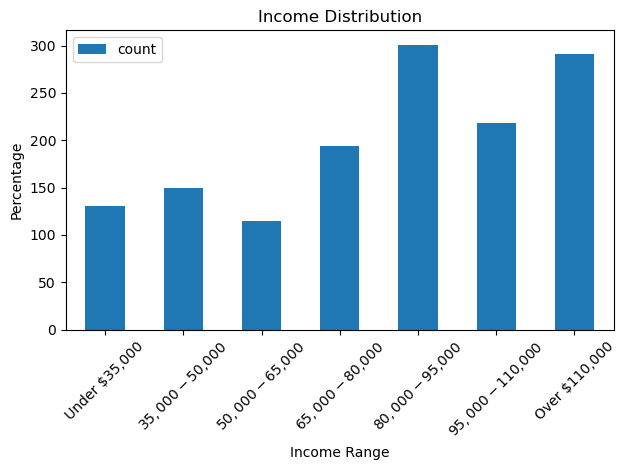

In [84]:
# Bar chart
income_sorted.plot(kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Percentage')
plt.title('Income Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### The majority of respondents (57.9%) had total household income  before taxes last year in the range of 80,000 and over 110.000. The data shows a roughly bell-shaped distribution, with most respondents falling into middle to higher income brackets. However, the highest bracket (Over $110,000) is slightly less common than the $80,000–$95,000 range. Products/services targeting middle to higher-income groups are likely to resonate with the majority.

## **Attitudes Towards Using the Internet for Vehicle Purchases**

In [93]:

# Function to calculate the count and percentage of unique values in a column
def values_count(column):
    # Get the count of each unique value in the column
    count = column.value_counts()
    
    # Calculate the percentage for each value based on the total number of rows in the dataframe
    # prcntgs = [f'{int(x / len(df) * 100)}' + '%' for x in count]
    prcntgs = [f"{round((x / len(df) * 100), 1)}%" for x in count]
    
    # Create a DataFrame with the count and percentage of each unique value
    result = pd.DataFrame({
        column.name: count.index,  # The column name as the title of the first column
        'Count': count.values,     # The count of occurrences of each unique value
        'Percentage': prcntgs      # The calculated percentage for each unique value
    })
    
    # Print the column name for reference (optional)
    print(column.name)

    # Return the resulting DataFrame with counts and percentages
    return result


In [94]:
# 	The Internet is a good tool to use when researching an automobile purchase.
rsrch_auto_prchs=values_count(df['The Internet is a good tool to use when researching an automobile purchase.'])
rsrch_auto_prchs


The Internet is a good tool to use when researching an automobile purchase.


,The Internet is a good tool to use when researching an automobile purchase.,Count,Percentage
0,Disagree,361,25.8%
1,Neutral,336,24.0%
2,Agree,296,21.1%
3,Strongly Disagree,252,18.0%
4,Strongly Agree,155,11.1%


#### Combined, the disagree (361) and strongly disagree (252) categories account for a significant portion (43.8%) of respondents, suggesting skepticism about the internet's usefulness for this purpose. Those who agree (21.1%) and strongly agree (11.1%) represent a smaller group (32.2% combined), indicating that a minority of respondents see the internet as a valuable tool for researching automobile purchases. A sizable portion of respondents (24.0%) remains neutral, which may indicate ambivalence or lack of strong feelings toward the statement. his could indicate the need to improve online resources or strategies to build trust and enhance the internet's perceived value in the car-buying process.

In [95]:
# The Internet should not be used to purchase vehicles.
intrnt_no_prchs_v=values_count(df['The Internet should not be used to purchase vehicles.'])
intrnt_no_prchs_v

The Internet should not be used to purchase vehicles.


,The Internet should not be used to purchase vehicles.,Count,Percentage
0,Neutral,420,30.0%
1,Strongly Agree,323,23.1%
2,Strongly Disagree,253,18.1%
3,Agree,205,14.6%
4,Disagree,199,14.2%


#### The group of respondents who either agree or strongly agree with the statement makes up 37.7% which is 5.4% more than the group of respondents who disagree or strongly disagree with the statement. And a sizable portion of respondents (30.0%) remains neutral. All this indicates a lack of trust in the internet for purchasing vehicles.

In [96]:
dlrship= values_count(df['Online dealerships are just another way of getting you into the traditional dealership.'])
dlrship

Online dealerships are just another way of getting you into the traditional dealership.


,Online dealerships are just another way of getting you into the traditional dealership.,Count,Percentage
0,Strongly Disagree,465,33.2%
1,Disagree,455,32.5%
2,Neutral,345,24.6%
3,Agree,114,8.1%
4,Strongly Agree,21,1.5%


#### Only 9.6% respondents agree or strongly agree with the statement. The strong disagreement and disagreement categories together represent a clear majority (65.7%), which suggests a broad perception that online dealerships operate independently of traditional dealerships. For online dealerships: This positive sentiment could be leveraged in marketing to emphasize their independence and differentiation from traditional dealerships, enhancing customer trust in their unique value.

In [97]:
negotiate=values_count(df['People feel they can negotiate a better price by talking with a sales representative in person.'])
negotiate

People feel they can negotiate a better price by talking with a sales representative in person.


,People feel they can negotiate a better price by talking with a sales representative in person.,Count,Percentage
0,Strongly Disagree,501,35.8%
1,Strongly Agree,394,28.1%
2,Neutral,185,13.2%
3,Disagree,172,12.3%
4,Agree,148,10.6%


In [98]:
tradesins=values_count(df['People usually have trade-ins that are too complicated to deal with online.'])
tradesins

People usually have trade-ins that are too complicated to deal with online.


,People usually have trade-ins that are too complicated to deal with online.,Count,Percentage
0,Strongly Agree,466,33.3%
1,Strongly Disagree,378,27.0%
2,Agree,196,14.0%
3,Neutral,184,13.1%
4,Disagree,176,12.6%


### Almost half of respondents (47.3%) agree that trade-ins are too complicated to deal with online. With 13.1% neutral, only 39.6% respondents disagree with the statement. For online deal

In [249]:
# People like to have a "hands on" situation when buying different options for their vehicle.
handson_exprnc=values_count(df['People like to have a "hands on" situation when buying different options for their vehicle.'])
handson_exprnc


People like to have a "hands on" situation when buying different options for their vehicle.


,"People like to have a ""hands on"" situation when buying different options for their vehicle.",Count,Percentage
0,Strongly Agree,589,42
1,Agree,383,27
2,Neutral,304,21
3,Disagree,92,6
4,Strongly Disagree,32,2


In [250]:
# People want to see the vehicle before they buy it to check for imperfections.
see_vhcl=values_count(df['People want to see the vehicle before they buy it to check for imperfections.'])
see_vhcl


People want to see the vehicle before they buy it to check for imperfections.


,People want to see the vehicle before they buy it to check for imperfections.,Count,Percentage
0,Strongly Disagree,802,57
1,Disagree,320,22
2,Neutral,185,13
3,Agree,71,5
4,Strongly Agree,22,1


In [251]:
# People want to test the performance of the vehicle before buying it
test_vhcl=values_count(df['People want to test the performance of the vehicle before buying it.'])
test_vhcl

People want to test the performance of the vehicle before buying it.


,People want to test the performance of the vehicle before buying it.,Count,Percentage
0,Strongly Agree,828,59
1,Agree,451,32
2,Neutral,113,8
3,Disagree,8,0


In [253]:
with pd.ExcelWriter('tables.xlsx') as writer:
    rsrch_auto_prchs.to_excel(writer, sheet_name='rsrch_auto_prchs', index=False)
    intrnt_no_prchs_v.to_excel(writer, sheet_name='intrnt_no_prchs_v', index=False)
    dlrship.to_excel(writer, sheet_name='dlrship', index=False)
    negotiate.to_excel(writer, sheet_name='negotiate', index=False)
    tradesins.to_excel(writer, sheet_name='tradesins', index=False)
    handson_exprnc.to_excel(writer, sheet_name='handson_exprnc', index=False)
    test_vhcl.to_excel(writer, sheet_name='test_vhcl', index=False)
    see_vhcl.to_excel(writer, sheet_name='see_vhcl', index=False)
    
    # Add more tables as needed


In [230]:
# # List of columns you want to analyze
# columns_to_analyze = [
#     "Online dealerships are just another way of getting you into the traditional dealership.",
#     "People feel they can negotiate a better price by talking with a sales representative in person.",
#     "People usually have trade-ins that are too complicated to deal with online.",
#     "People like to have a \"hands on\" situation when buying different options for their vehicle.",
#     "People want to see the vehicle before they buy it to check for imperfections.",
#     "People want to test the performance of the vehicle before buying it."
# ]

# # Initialize an empty list to store the results for all columns
# all_results = []

# # Loop through each column name in the list
# for column in columns_to_analyze:
#     # Call the values_count function for each column
#     result = values_count(df[column])
#     print(result)
    
#     # Append the result DataFrame to the list
    # all_results.append(result)

# # Display the final result
# print(all_results)

    

Online dealerships are just another way of getting you into the traditional dealership.
  Online dealerships are just another way of getting  Count Percentage
0                                  Strongly Disagree    465        33%
1                                           Disagree    455        32%
2                                            Neutral    345        24%
3                                              Agree    114         8%
4                                     Strongly Agree     21         1%
People feel they can negotiate a better price by talking with a sales representative in person.
  People feel they can negotiate a better price by t  Count Percentage
0                                  Strongly Disagree    501        35%
1                                     Strongly Agree    394        28%
2                                            Neutral    185        13%
3                                           Disagree    172        12%
4                                  

### **Perceptions of Internet and Internet-Based Purchasing**

In [75]:
# How often do you make purchases through the Internet?
how_oftn_prchs=values_count(df['How often do you make purchases through the Internet?'], len(df))
how_oftn_prchs

,Count,Percentage
How often do you make purchases through the Internet?,,
Almost never,331,23%
Occasionally,322,23%
Often,298,21%
Never,279,19%
Very often,170,12%


In [76]:
### Do you like using the Internet?
intrnt_like=values_count(df['I like using the Internet.'], len(df))
intrnt_like

,Count,Percentage
I like using the Internet.,,
Disagree,358,25%
Neutral,331,23%
Agree,309,22%
Strongly Disagree,250,17%
Strongly Agree,152,10%


In [77]:
# Count purchases by gender
gender_grouped = df.groupby("Your gender is...")['I like using the Internet.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
# Append '%' to all values in the DataFrame
gender_grouped = gender_grouped.map(lambda v: f'{v}%')
print(gender_grouped)
        
# # Count purchases by gender
# gender_grouped = df.groupby('gender')['purchasing_behavior'].value_counts(normalize=True).unstack(fill_value=0)
# print(gender_grouped)

I like using the Internet. Agree Disagree Neutral Strongly Agree  \
Your gender is...                                                  
Female                       15%      33%     22%             3%   
Male                         24%      24%     24%            13%   

I like using the Internet. Strongly Disagree  
Your gender is...                             
Female                                   27%  
Male                                     16%  


C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\4292020063.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped = df.groupby("Your gender is...")['I like using the Internet.'].value_counts(normalize=True).mul(100) \


In [114]:
import pandas as pd

# Adjust display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # No line wrapping

def 

# Correct way to group by two columns
gender_grouped = df.groupby(["Your gender is...", "Age"])['I like using the Internet.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
gender_grouped

C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\2289531266.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped = df.groupby(["Your gender is...", "Age"])['I like using the Internet.'].value_counts(normalize=True).mul(100) \


I like using the Internet.  Agree  Disagree  Neutral  Strongly Agree  \
Your gender is... Age                                                  
Female            20–29        17        26       30               2   
                  30–39        17        36       18               4   
                  40–49        11        37       19               2   
                  50-59        12        29       29               0   
                  60-69         0         0        0               0   
Male              20–29        28        17       22              18   
                  30–39        25        19       29              18   
                  40–49        20        33       20               4   
                  50-59        12        39       20               0   
                  60-69        33        17       33               0   

I like using the Internet.  Strongly Disagree  
Your gender is... Age                          
Female            20–29                    25  
                  30–39                    25  
                  40–49                    32  
                  50-59                    29  
                  60-69                   100  
Male              20–29                    15  
                  30–39                     9  
                  40–49                    22  
                  50-59                    29  
                  60-69                    17

In [78]:
# Count purchases by gender
gender_grouped_rsrch_prchs = df.groupby("Your gender is...")['I use the Internet to research purchases I make.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
gender_grouped_rsrch_prchs = gender_grouped_rsrch_prchs.map(lambda v: f'{v}%')
gender_grouped_rsrch_prchs



C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\183531664.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped_rsrch_prchs = df.groupby("Your gender is...")['I use the Internet to research purchases I make.'].value_counts(normalize=True).mul(100) \


I use the Internet to research purchases I make.,Agree,Disagree,Neutral,Strongly Agree,Strongly Disagree
Your gender is...,,,,,
Female,19%,31%,26%,8%,15%
Male,25%,20%,25%,19%,11%


In [100]:
# Count purchases by gender
gender_grouped_rsch_prchs = df.groupby("Your gender is...")['The Internet is a good tool to use when researching an automobile purchase.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
gender_grouped_rsch_prchs
# Append '%' to all values in the DataFrame
# gender_grouped_intrnt_prchs = gender_grouped_intrnt_prchs.map(lambda v: int( f'{v}%'))


C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\1641356149.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped_rsch_prchs = df.groupby("Your gender is...")['The Internet is a good tool to use when researching an automobile purchase.'].value_counts(normalize=True).mul(100) \


The Internet is a good tool to use when researching an automobile purchase.,Agree,Disagree,Neutral,Strongly Agree,Strongly Disagree
Your gender is...,,,,,
Female,13,34,25,5,22
Male,23,24,24,13,17


In [110]:
gender_grouped_rsch_prchs['Agree to Strongly Agree']=gender_grouped_rsch_prchs[['Agree', 'Strongly Agree']].sum(axis=1)
gender_grouped_rsch_prchs['Disagree to Strongly Disagree']=gender_grouped_rsch_prchs[['Disagree', 'Strongly Disagree']].sum(axis=1)
gender_grouped_rsch_prchs

The Internet is a good tool to use when researching an automobile purchase.,Agree,Disagree,Neutral,Strongly Agree,Strongly Disagree,Agree to Strongly Agree,Disagree to Strongly Disagree
Your gender is...,,,,,,,
Female,13,34,25,5,22,18,56
Male,23,24,24,13,17,36,41


TypeError: 'int' object is not callable

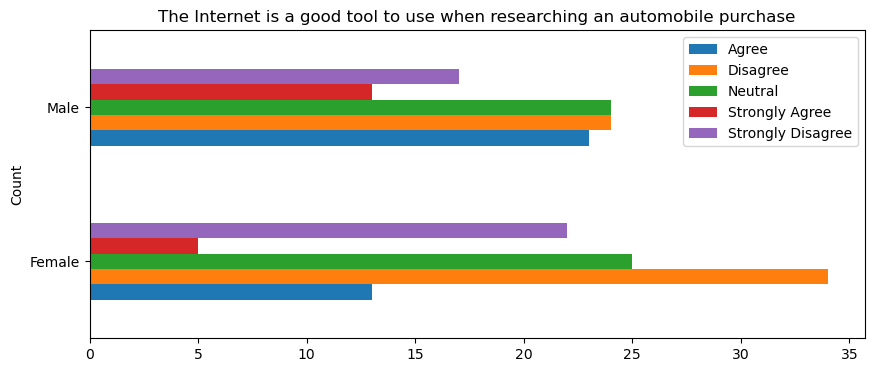

In [87]:
# plt.figure(figsize=(10, 3))  # Set the desired size 
# Create the bar chart
gender_grouped_intrnt_prchs.plot(kind='barh',figsize=(10, 4))
plt.title('The Internet is a good tool to use when researching an automobile purchase')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xlim(0,100)
plt.show()


In [98]:
# Count purchases by gender
gender_grouped_no_prchs_v = df.groupby("Your gender is...")['The Internet should not be used to purchase vehicles.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
gender_grouped_no_prchs_v = gender_grouped_no_prchs_v.map(lambda v: f'{v}%')
gender_grouped_no_prchs_v



C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\3016429416.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped_no_prchs_v = df.groupby("Your gender is...")['The Internet should not be used to purchase vehicles.'].value_counts(normalize=True).mul(100) \


The Internet should not be used to purchase vehicles.,Agree,Disagree,Neutral,Strongly Agree,Strongly Disagree
Your gender is...,,,,,
Female,13%,13%,31%,29%,15%
Male,15%,15%,30%,22%,19%


In [99]:
# Count purchases by gender
gender_grouped_how_oftn_prchs = df.groupby("Your gender is...")['The Internet is a good tool to use when researching an automobile purchase.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
gender_grouped_how_oftn_prchs = gender_grouped_how_oftn_prchs.map(lambda v: f'{v}%')
gender_grouped_how_oftn_prchs



C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\490142627.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped_how_oftn_prchs = df.groupby("Your gender is...")['How often do you make purchases through the Internet?'].value_counts(normalize=True).mul(100) \


How often do you make purchases through the Internet?,Almost never,Never,Occasionally,Often,Very often
Your gender is...,,,,,
Female,32%,30%,22%,16%,0%
Male,22%,17%,23%,23%,15%


In [ ]:
# print(rsrch_auto_prchs.columns)
# Combine 'Agree' and 'Strongly Agree'
rsrch_auto_prchs['Count'] = pd.to_numeric(rsrch_auto_prchs['Count'], errors='coerce')
print(rsrch_auto_prchs)
agree_strng_agree=rsrch_auto_prchs[rsrch_auto_prchs['Category'].isin(['Agree', 'Strongly Agree'])]['Count'].sum()/len(df)*100
agree_strng_agree
# gender_grouped_rsch_prchs = df.groupby("Your gender is...")['The Internet is a good tool to use when researching an automobile purchase.'].value_counts(normalize=True).mul(100) \
#     .round(0) \
#     .astype(int) \
#     .unstack(fill_value=0)
# gender_grouped_rsch_prchs
# # Append '%' to all values in the DataFrame
# # gender_grouped_intrnt_prchs = gender_grouped_intrnt_prchs.map(lambda v: int( f'{v}%'))